In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df=pd.read_csv("vehicle performance.csv")

In [67]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [69]:
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [70]:
df.shape

(398, 9)

In [71]:
df.describe()

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697


In [72]:
df['origin'].unique()

array([1, 3, 2], dtype=int64)

In [73]:
df['origin']=df['origin'].astype('object')

In [74]:
df['cylinders']=df['cylinders'].astype('object')

In [75]:
df['horsepower']=[i.replace('?','-1') for i in df['horsepower']]
df['horsepower']=df['horsepower'].astype('int')
df['horsepower'].replace(-1,df['horsepower'].mean(),inplace=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    object 
 1   cylinders            398 non-null    object 
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 28.1+ KB


In [77]:
df.drop(['name'],inplace=True,axis=1)

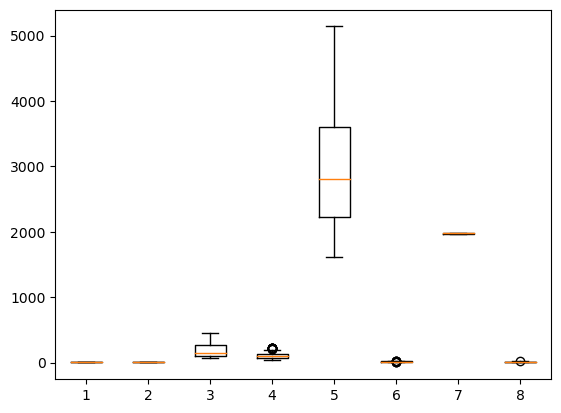

In [86]:
plt.boxplot(df)
plt.show()

In [89]:
sns.heatmap(data=df.corr(),annot=True)

<AxesSubplot:>

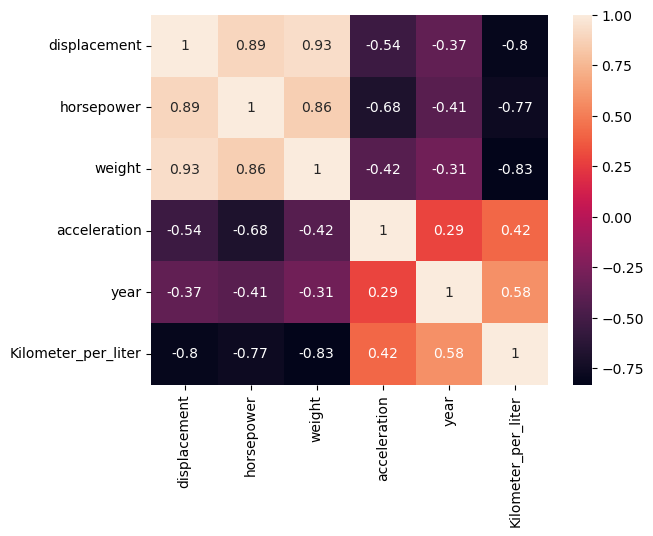

In [90]:
plt.show()

In [91]:
sns.pairplot(df)

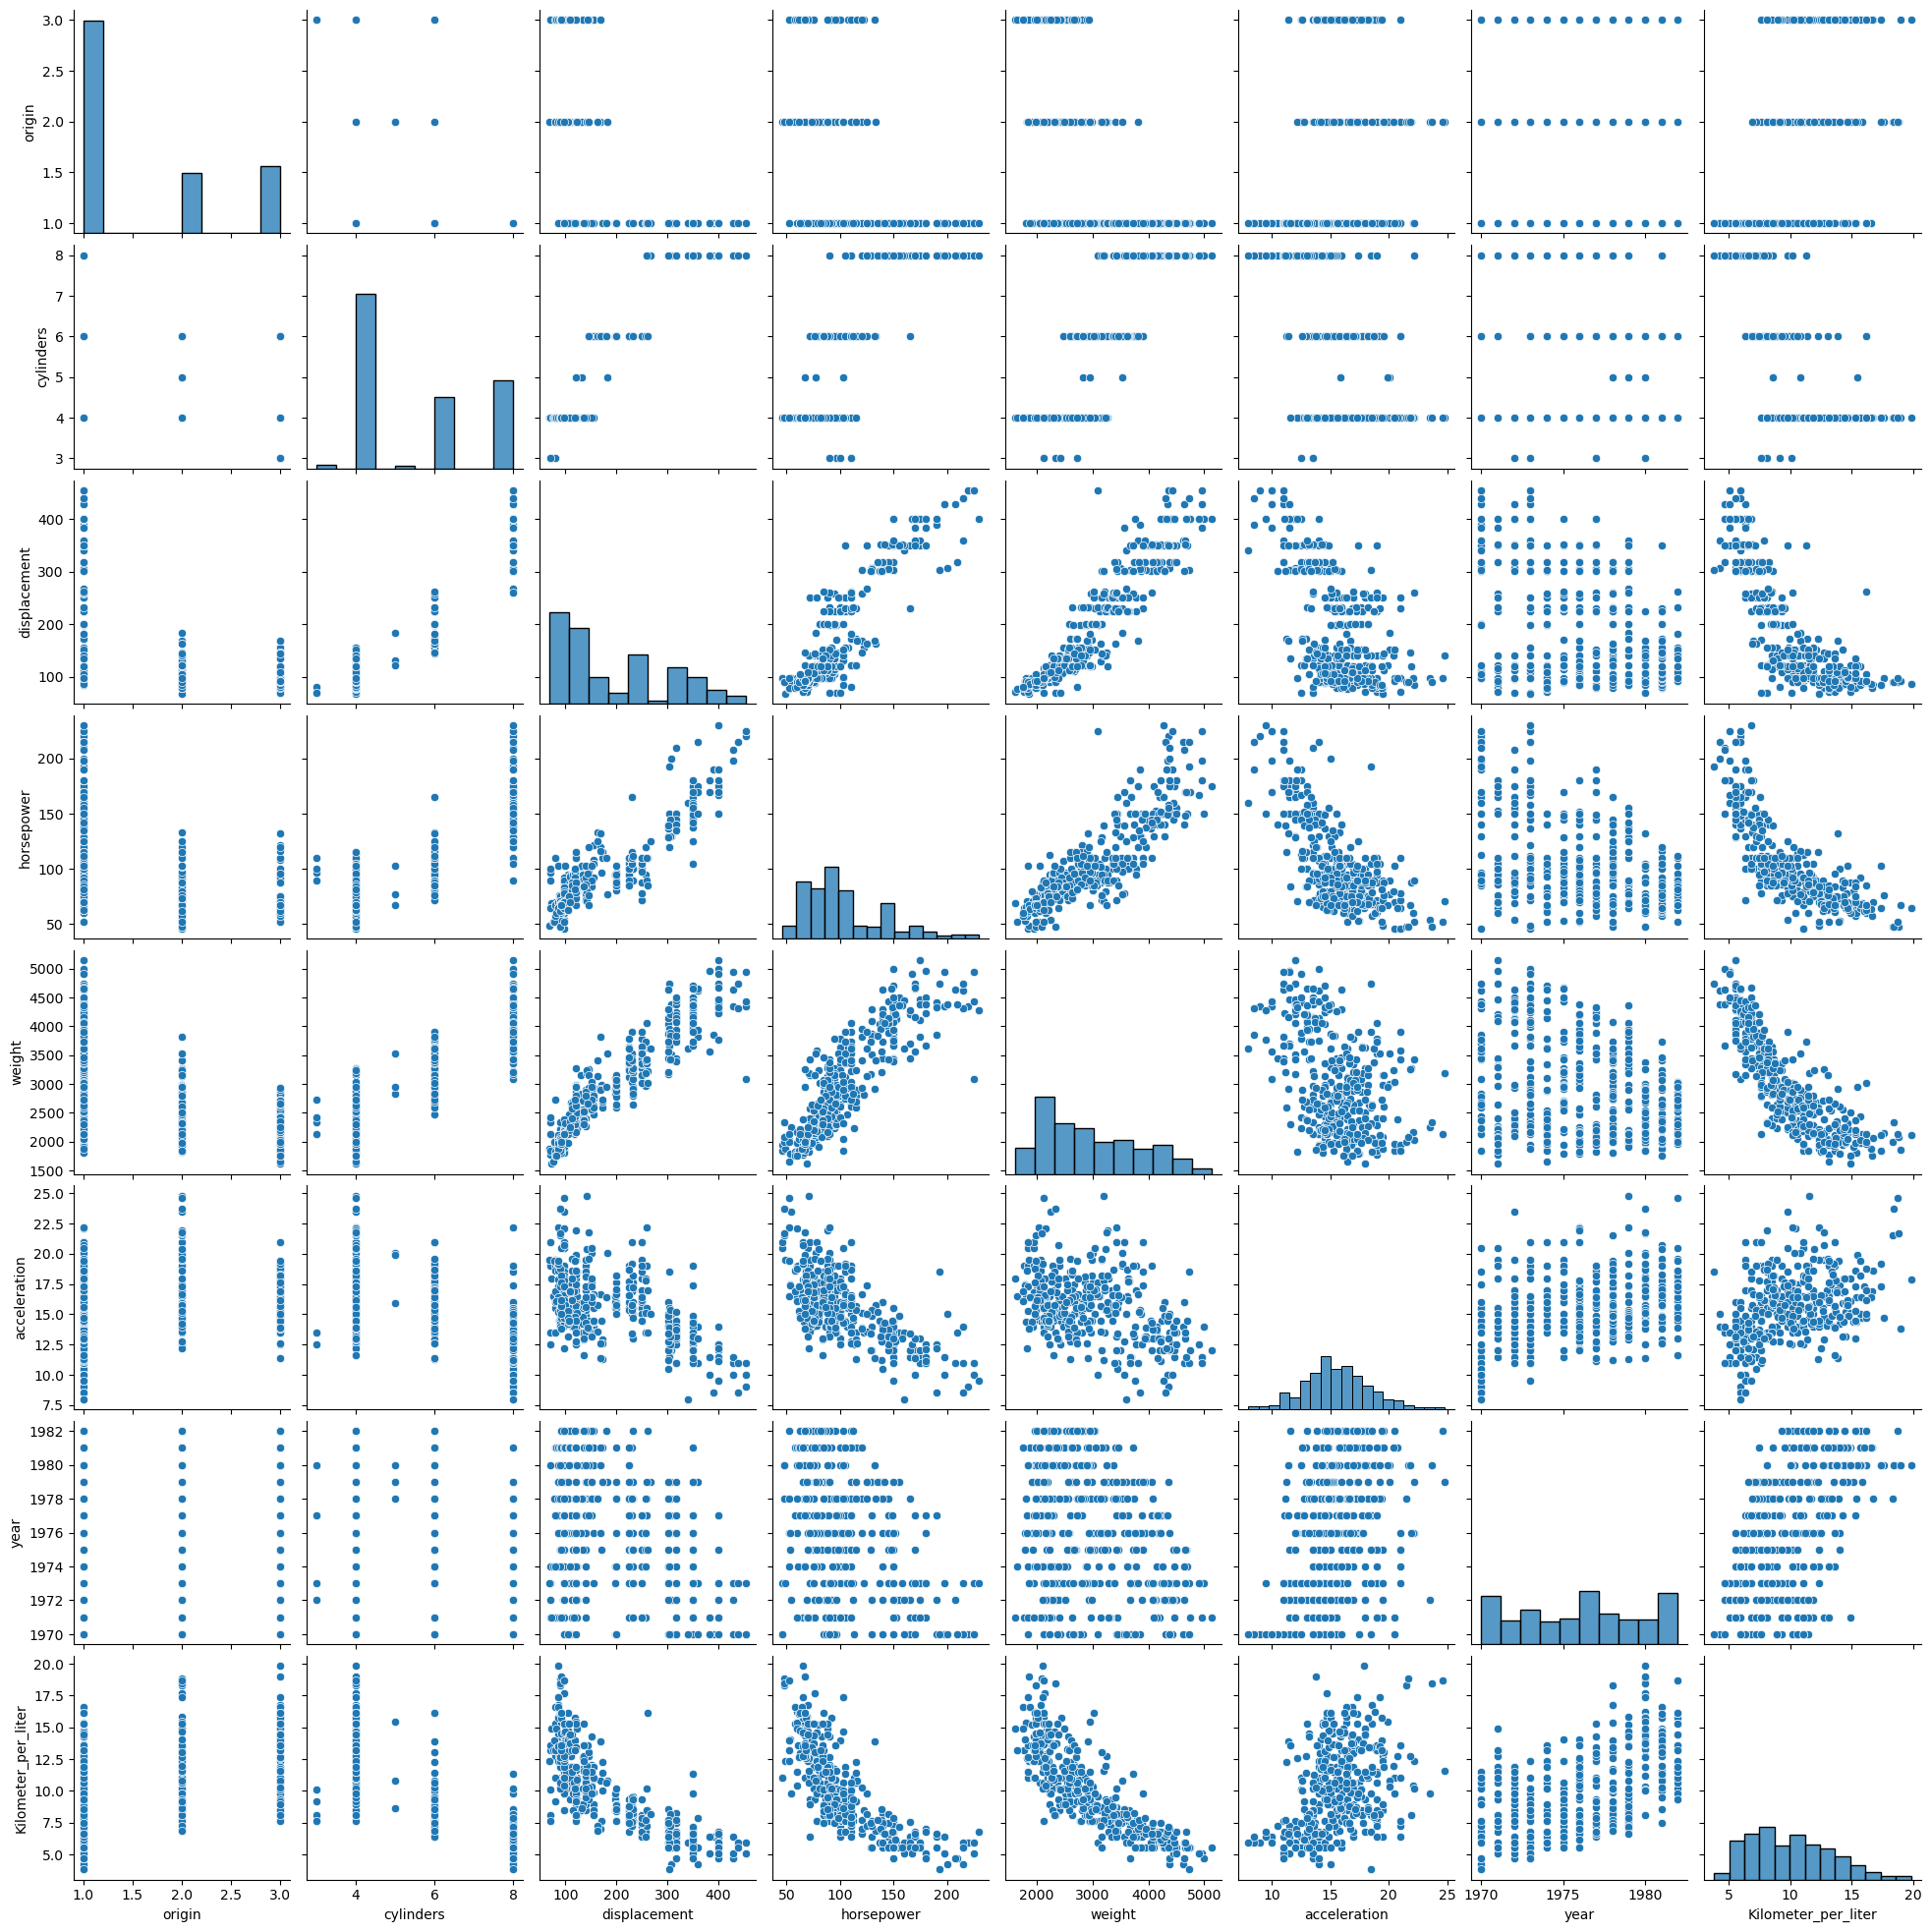

In [92]:
plt.show()

In [93]:
x=df.drop(columns='Kilometer_per_liter')
y=df['Kilometer_per_liter']

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import SGDRegressor
import warnings
warnings.filterwarnings('ignore')

In [103]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=2,test_size=0.25)

In [97]:
for i in df[['origin','cylinders']].columns:
    le=LabelEncoder()
    xtrain[i]=le.fit_transform(xtrain[i])
    xtest[i]=le.fit_transform(xtest[i])

In [107]:
loss=['squared_error','huber','epsilon_insensitive','squared_epsilon_insensitive']
penalty=['l1','l2','elasticnet']
alpha=[0.000001,0.00001,0.0001,0.001,0.01,0.1,0.5,1,10,100]
learning_rate=['constant','optimal','invscaling','adaptive']
max_iter=[10,50,100]
eta0=[0.001,0.01,0.1,0.2,0.3,0.4,0.5,1,10,100]
param_distributions=dict(loss=loss,penalty=penalty,alpha=alpha,learning_rate=learning_rate,max_iter=max_iter,eta0=eta0)
sgd=SGDRegressor()
rand=RandomizedSearchCV(estimator=sgd,param_distributions=param_distributions,n_iter=1000)
rand_res=rand.fit(xtrain,ytrain)
print(rand_res.best_score_)
print(rand_res.best_params_)

0.6457431256834653
{'penalty': 'l2', 'max_iter': 100, 'loss': 'huber', 'learning_rate': 'adaptive', 'eta0': 0.5, 'alpha': 10}


In [108]:
model=SGDRegressor(penalty= 'l2', max_iter= 100, loss= 'huber', learning_rate= 'adaptive', eta0= 0.5, alpha= 10)
model.fit(xtrain,ytrain)

SGDRegressor(alpha=10, eta0=0.5, learning_rate='adaptive', loss='huber',
             max_iter=100)

In [109]:
model.predict(xtest)

array([ 3.72365007, 12.68423573, 12.74908364, 10.48469111, 12.10145692,
        4.39544986,  4.06147292,  6.10139136,  5.35205307,  8.3360326 ,
        8.8774673 , 11.61085421, 13.67645622,  9.28418885, 13.23146056,
       11.77168038,  8.7627745 , 11.41291783, 13.82592132,  7.87790186,
       12.3207355 ,  8.07922784, 12.65849693, 11.415654  ,  4.83432241,
        7.17258208, 11.18774731, 10.10241012, 12.49005215,  7.77846372,
       13.47012862, 12.357059  , 10.77331734, 12.5475587 ,  4.72308873,
       13.25577512,  9.08963863, 13.72018464,  4.53365651, 12.91499364,
        8.19723719,  9.60067055,  9.64797338, 12.24836634, 12.41357856,
       13.12445212,  6.91307937,  5.29061629, 13.50211131, 11.88213879,
       12.73117058,  8.67389776, 11.43704957, 11.0409167 , 11.33344951,
        5.11052539, 12.77326735,  8.66588466,  5.86024686, 12.01782337,
       13.26508633, 11.55052728, 13.09098308,  7.39878442,  7.4741232 ,
       13.34920785, 10.94804311, 10.12836798,  5.19160317, 13.25

In [111]:
model.predict([[2,7,324,178,3574,14,1987]])

array([7.50298692])

In [125]:
model.predict([[1,5,367,178,3666,16,1999]])

array([7.17596559])